In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import kneighbors_graph
from scipy.sparse.csgraph import shortest_path
from scipy.linalg import eig
from sklearn import manifold
from operator import itemgetter

In [3]:
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

mnist = datasets.load_digits()
X_mnist = mnist.data
y_mnist = mnist.target

wine = datasets.load_wine()
X_wine = wine.data
y_wine = wine.target

# creation du graphe d'adgacence et pretraitement

In [4]:
kng = kneighbors_graph(X_iris, 50, mode='distance')

In [17]:
def TriVP(Valp,Vectp):
    # trie dans l'ordre décroisant les valeurs propres
    # en cas de valeurs propres complexes on trie  selon leu module
    liste1 = Vectp.tolist()
    liste2 = Valp.tolist()
    norme = np.abs(Valp)
    liste3 = norme.tolist()

    result = zip(liste1, liste2,liste3)
    result_trie =sorted(result,key =itemgetter(2), reverse=True)
    liste1, liste2, liste3 =  zip(*result_trie)
    Vectp = np.asarray(liste1)
    Valp = np.asarray(liste2)
    
    return Valp,Vectp

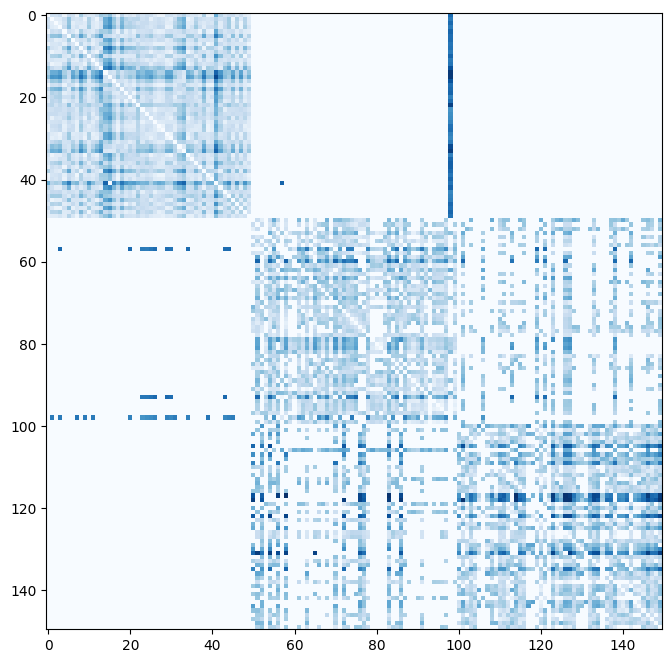

In [5]:
plt.figure(figsize=(8, 8))

plt.imshow(kng.todense(), cmap='Blues', interpolation='none')

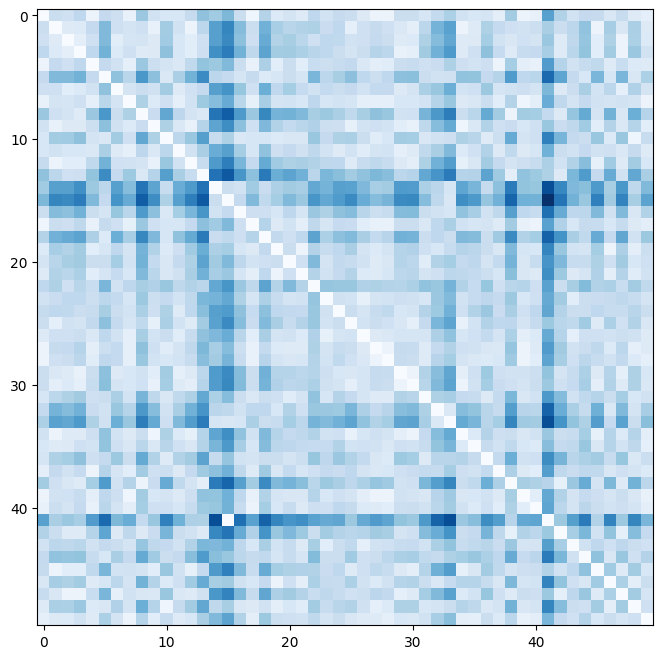

In [6]:
plt.figure(figsize=(8, 8))

plt.imshow(kng.todense()[:50, :50], cmap='Blues')

# Calcule des distances geodesiques

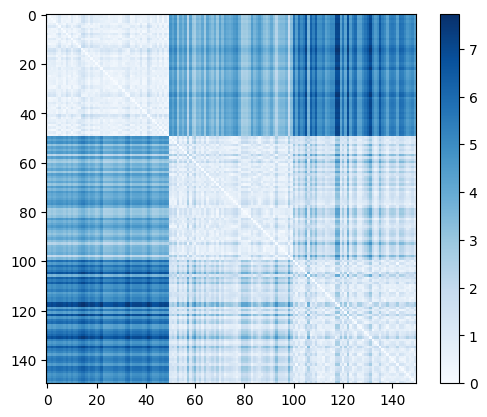

In [7]:
D = shortest_path(kng, directed=True)

plt.imshow(D, cmap='Blues', interpolation='none')
plt.colorbar()
plt.show()

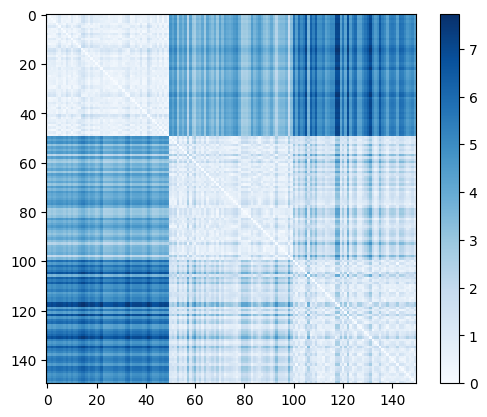

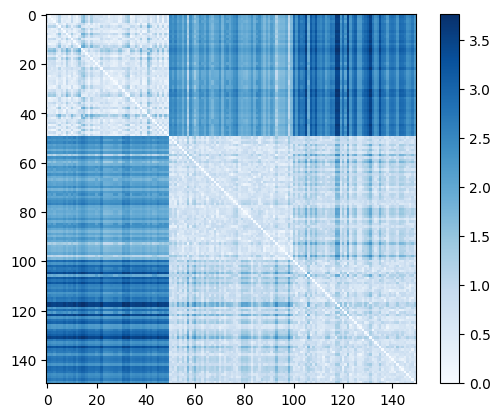

/home/talibe/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/talibe/miniconda3/lib/python3.12/site-packages/matplotlib/collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


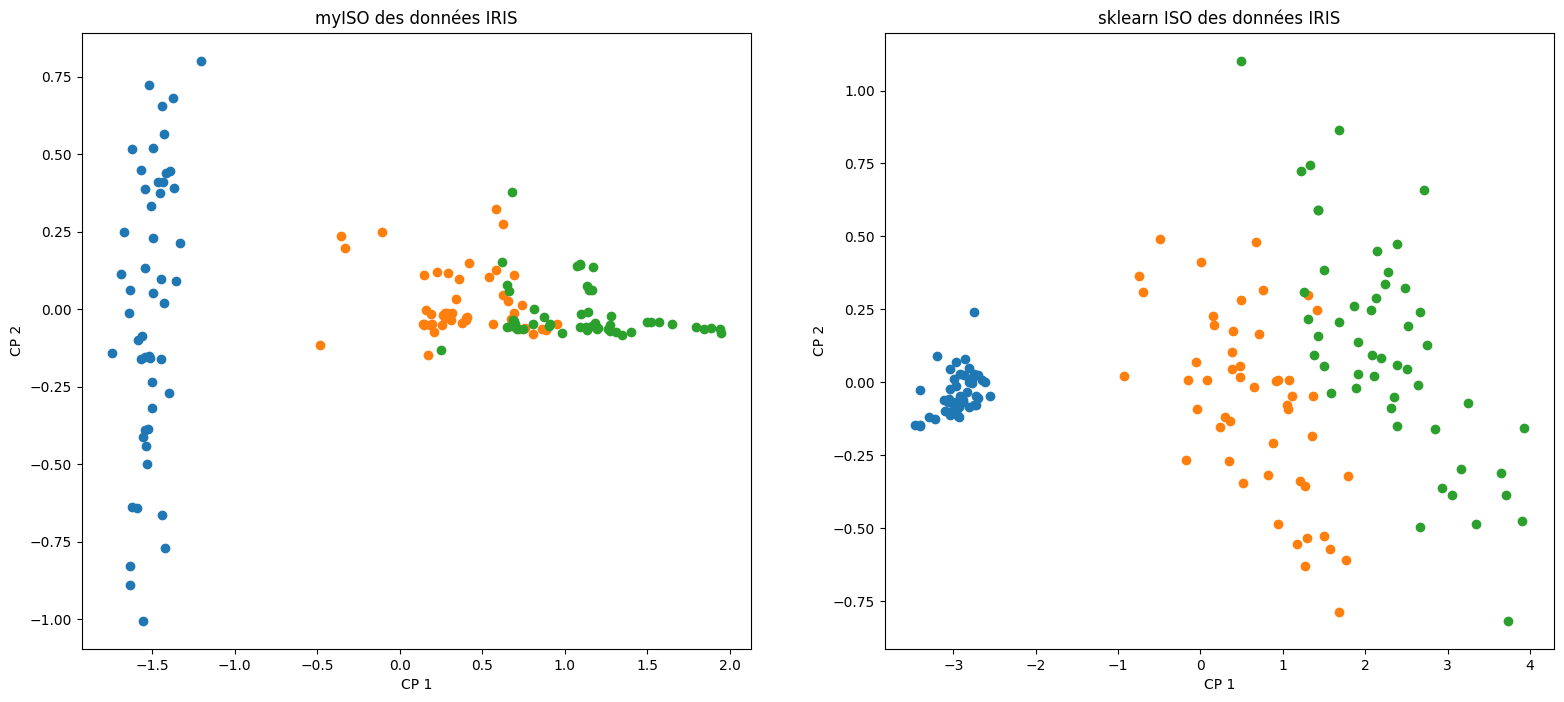

In [13]:
n_neighbors = 50
kng = kneighbors_graph(X_iris, n_neighbors=n_neighbors, mode='distance')

kng = (kng + kng.T)/2

D = shortest_path(kng, directed=True)

# D = (D + D.T)/2

if np.any(D == np.inf):
    D = np.where(D == np.inf, -np.inf, D)
    max_d = np.max(D)
    D = np.where(D == -np.inf, max_d+100, D)

  


plt.imshow(D, cmap='Blues', interpolation='none')
plt.colorbar()
plt.show()


m = D.shape[0]
Id = np.eye(m)

ones = np.ones(m)

# B = -.5*(1 - 1/n_neighbors)* (Id - 1/m*ones)@(D**2)@(Id - 1/m*ones)
B = -.5* (Id - 1/m*ones)@(D**2)@(Id - 1/m*ones)

v, V = eig(B)
from operator import itemgetter

# val_max, vec_max = TriVP(v,V)
idx = np.argsort(v)[::-1]
val_max = v[idx]
vec_max = V[:, idx]
Y = vec_max[:, :2]@np.diag(np.sqrt(val_max[:2]))

plt.subplots(nrows=1, ncols=2, figsize=(19, 8))
plt.subplot(1, 2, 1)
for classe in np.unique(y_iris):
    plt.scatter(Y[y_iris == classe, 0], Y[y_iris == classe, 1], label=classe)
# plt.scatter(Y[][:, 0], Y[:, 1], c=y_iris, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title('myISO des données IRIS')



X_iso = manifold.Isomap(n_neighbors=50, n_components=2).fit_transform(X_iris)
plt.subplot(1, 2, 2)
for classe in np.unique(y_iris):
    plt.scatter(X_iso[y_iris == classe, 0], X_iso[y_iris == classe, 1], label=classe)
# plt.scatter(X_iso[:, 0], X_iso[:, 1], c=y_iris, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title('sklearn ISO des données IRIS')
plt.show()

In [28]:


def MDS(X, y, n_neighbors=50, n_components=2, symetric=False, title="", Visualisation=True, **kwargs):
    """
    This function takes a dataframe and returns a dataframe with n_components
    columns that are the result of the multi-dimensional scalling.
    """

    # Import the necessary libraries
    kng = kneighbors_graph(X, n_neighbors=n_neighbors, mode='distance')

    if symetric:
        kng = (kng + kng.T)/2
        
    D = shortest_path(kng, directed=True)

    if np.any(D == np.inf):
        D = np.where(D == np.inf, -np.inf, D)
        max_d = np.max(D)
        D = np.where(D == -np.inf, max_d+100, D)

    # if symetric:
    #     D = (D + D.T)/2

    if "viz_distance" in kwargs:
        plt.imshow(D, cmap='Blues', interpolation='none')
        plt.colorbar()
        plt.show()

    m = D.shape[0]
    Id = np.eye(m)

    ones = np.ones(m)

    # B = -.5*(1 - 1/n_neighbors)* (Id - 1/m*ones)@(D**2)@(Id - 1/m*ones)
    B = -.5* (Id - (1/m)*ones)@(D**2)@(Id - (1/m)*ones)

    v, V = np.linalg.eig(B)

    idx = np.argsort(v)[::-1]
    val_max = v[idx]
    vec_max = V[:, idx]

    Y = vec_max[:, :n_components]@np.diag(np.sqrt(val_max[:n_components]))
    if Visualisation:
        plot_mds(Y,X, y, n_components=2, n_neighbors=n_neighbors, title=title)
    return Y


def plot_mds(Y,X, y, n_components=2, n_neighbors=50, title=""):
    plt.subplots(nrows=1, ncols=2, figsize=(19, 8))
    plt.subplot(1, 2, 1)
    for classe in np.unique(y):
        plt.scatter(Y[y == classe, 0], Y[y == classe, 1], label=classe)
    plt.xlabel('CP 1')
    plt.ylabel('CP 2')
    plt.title(f"IsoMap {title}")
    plt.legend()

    X_iso = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components).fit_transform(X)
    plt.subplot(1, 2, 2)
    for classe in np.unique(y):
        plt.scatter(X_iso[y == classe, 0], X_iso[y == classe, 1], label=classe)
    plt.xlabel('CP 1')
    plt.ylabel('CP 2')
    plt.title(f"sklearn IsoMap {title}")
   
  
    plt.legend()
    plt.show()


/home/talibe/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/talibe/miniconda3/lib/python3.12/site-packages/matplotlib/collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


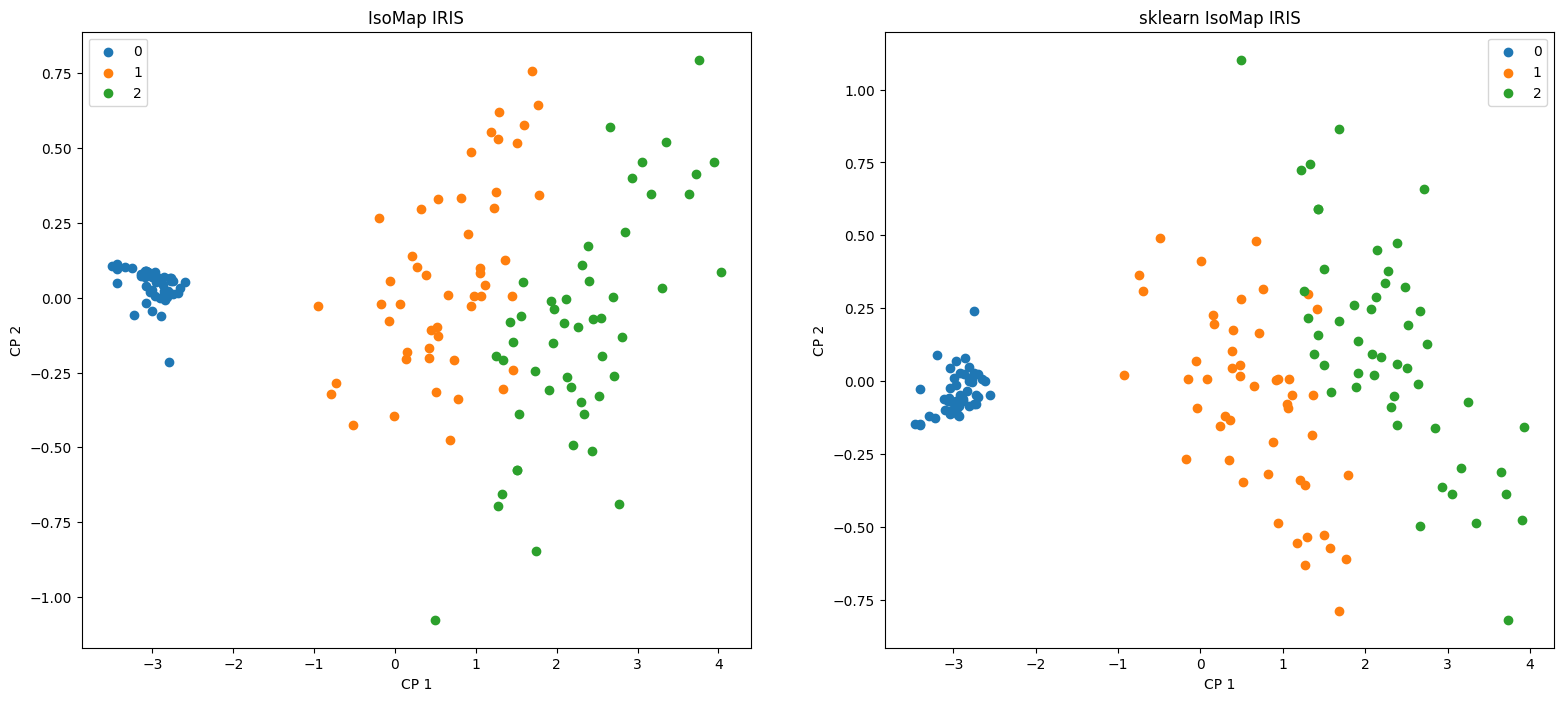

In [24]:
Y = MDS(X_iris, y_iris, n_neighbors=50, n_components=2, title="IRIS")

In [30]:
nns = np.array([ 30 , 40, 50, 60, 70, 80])
print(nns[::2])
nns[1::2]

[30 50 70]


array([40, 60, 80])

/home/talibe/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/talibe/miniconda3/lib/python3.12/site-packages/matplotlib/collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/home/talibe/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/talibe/miniconda3/lib/python3.12/site-packages/matplotlib/collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/home/talibe/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/talibe/miniconda3/lib/python3.12/site-packages

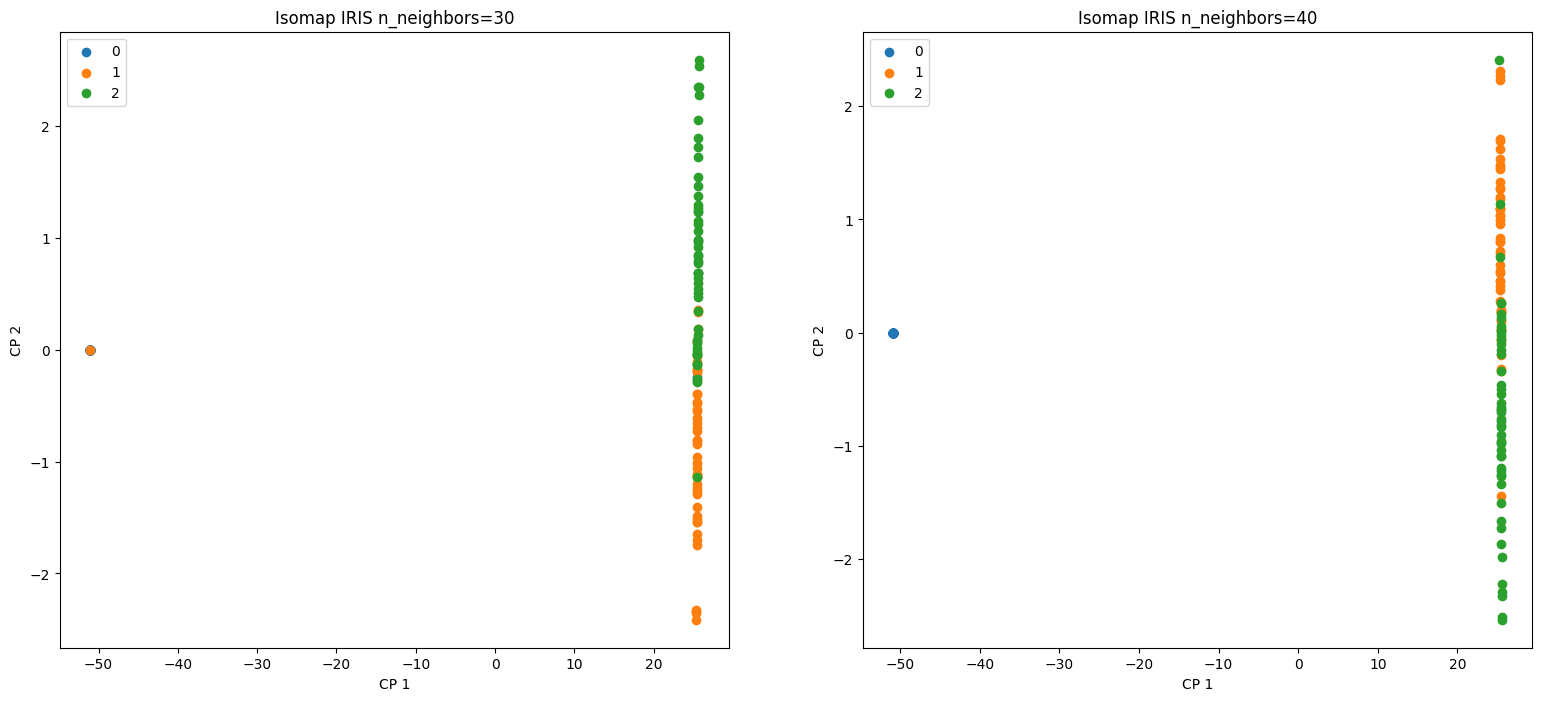

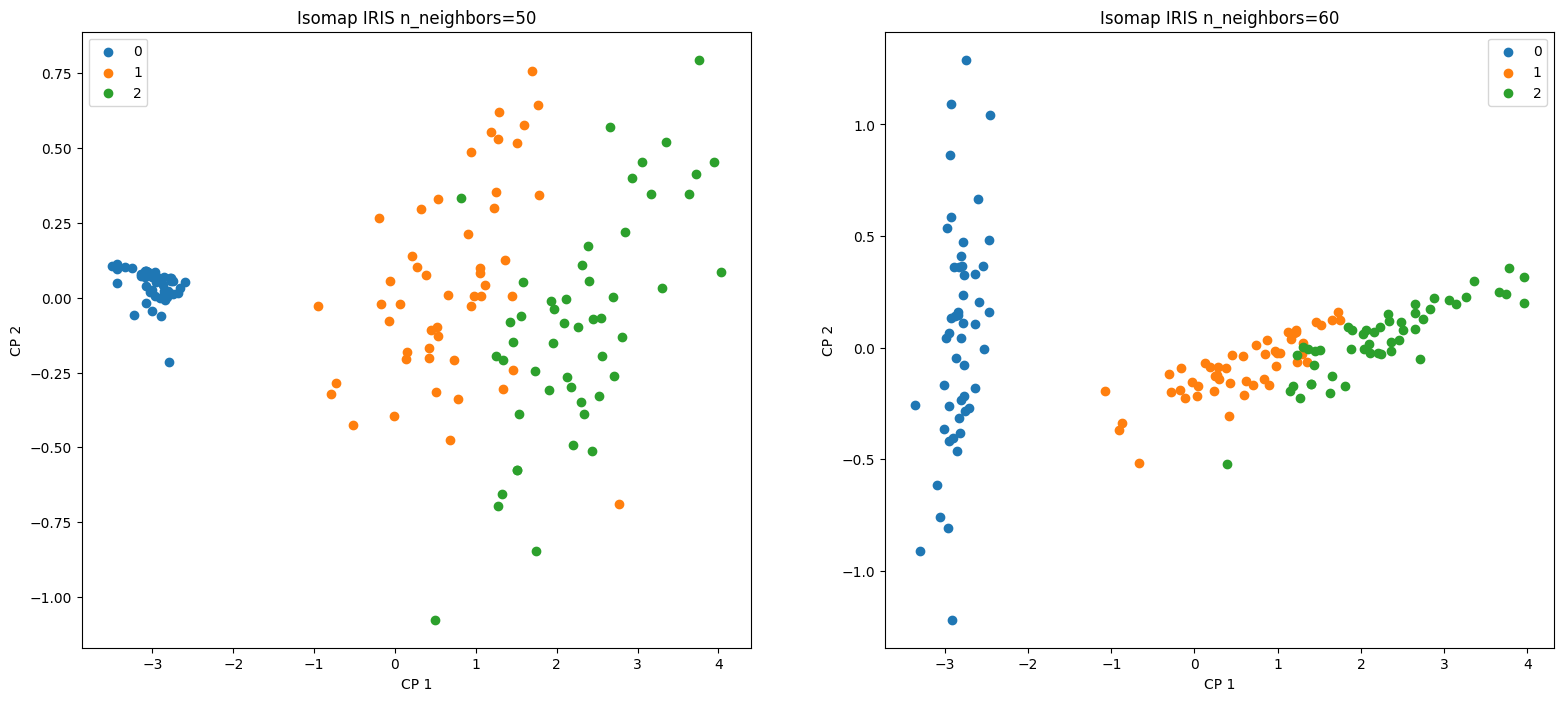

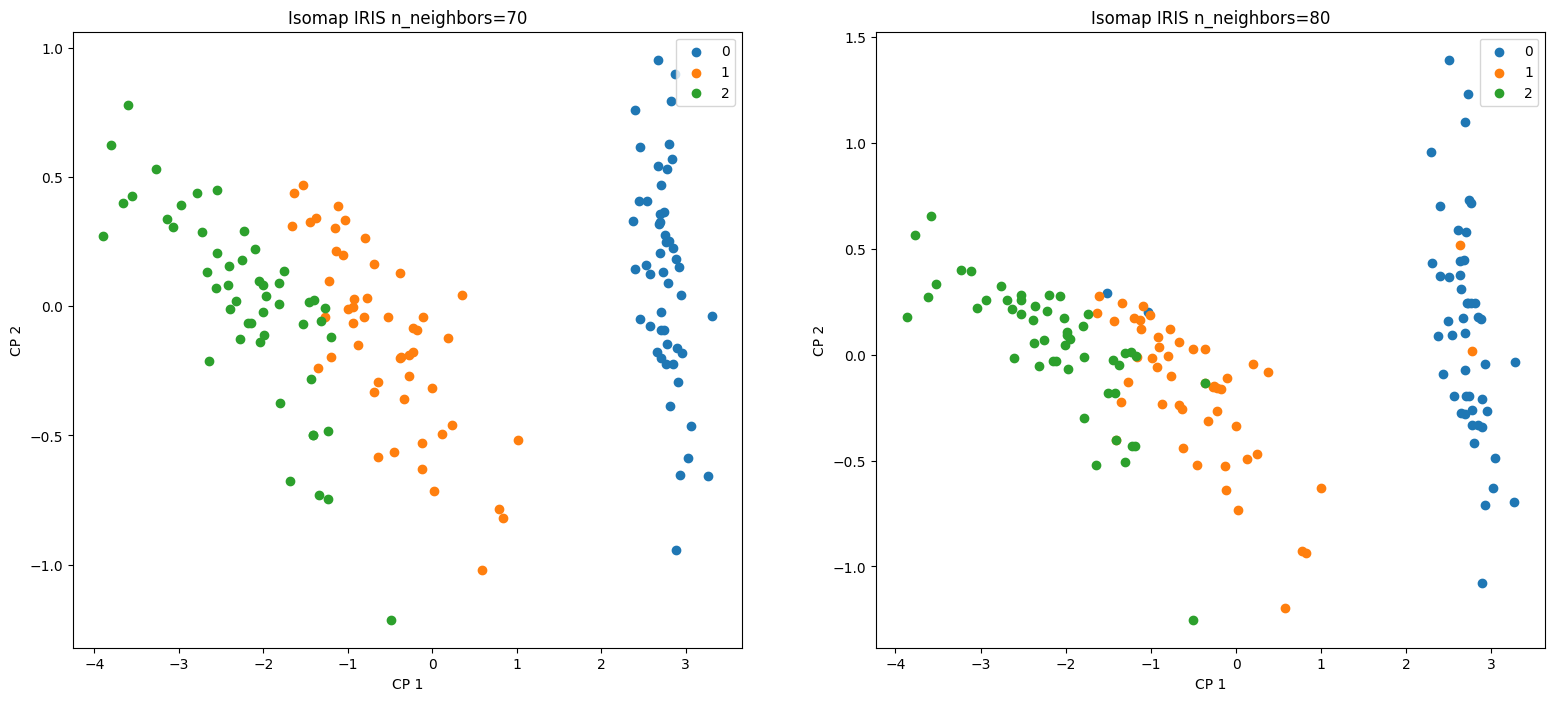

In [44]:
nns = np.array([ 30 , 40, 50, 60, 70, 80])

for nn1, nn2 in zip(nns[::2], nns[1::2]):
    plt.subplots(nrows=1, ncols=2, figsize=(19, 8))
    plt.subplot(1, 2, 1)
    Y = MDS(X_iris, y_iris, n_neighbors=nn1, n_components=2, title=f"IRIS n_neighboor {nn1}", Visualisation=False)
    for classe in np.unique(y_iris):
        plt.scatter(Y[y_iris == classe, 0], Y[y_iris == classe, 1], label=classe)
    # plt.scatter(Y[:, 0], Y[:, 1], c=y_iris, cmap=plt.cm.Set1, edgecolor='k')
    plt.xlabel('CP 1')
    plt.ylabel('CP 2')
    plt.title(f"Isomap IRIS n_neighbors={nn1}")
    plt.legend()
    plt.subplot(1, 2, 2)
    Y = MDS(X_iris, y_iris, n_neighbors=nn2, n_components=2, title=f"IRIS n_neighboor {nn2}", Visualisation=False)
    for classe in np.unique(y_iris):
        plt.scatter(Y[y_iris == classe, 0], Y[y_iris == classe, 1], label=classe)
    # plt.scatter(Y[:, 0], Y[:, 1], c=y_iris, cmap=plt.cm.Set1, edgecolor='k')
    plt.xlabel('CP 1')
    plt.ylabel('CP 2')
    plt.legend()
    plt.title(f"Isomap IRIS n_neighbors={nn2}")
   
    

/home/talibe/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/talibe/miniconda3/lib/python3.12/site-packages/matplotlib/collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


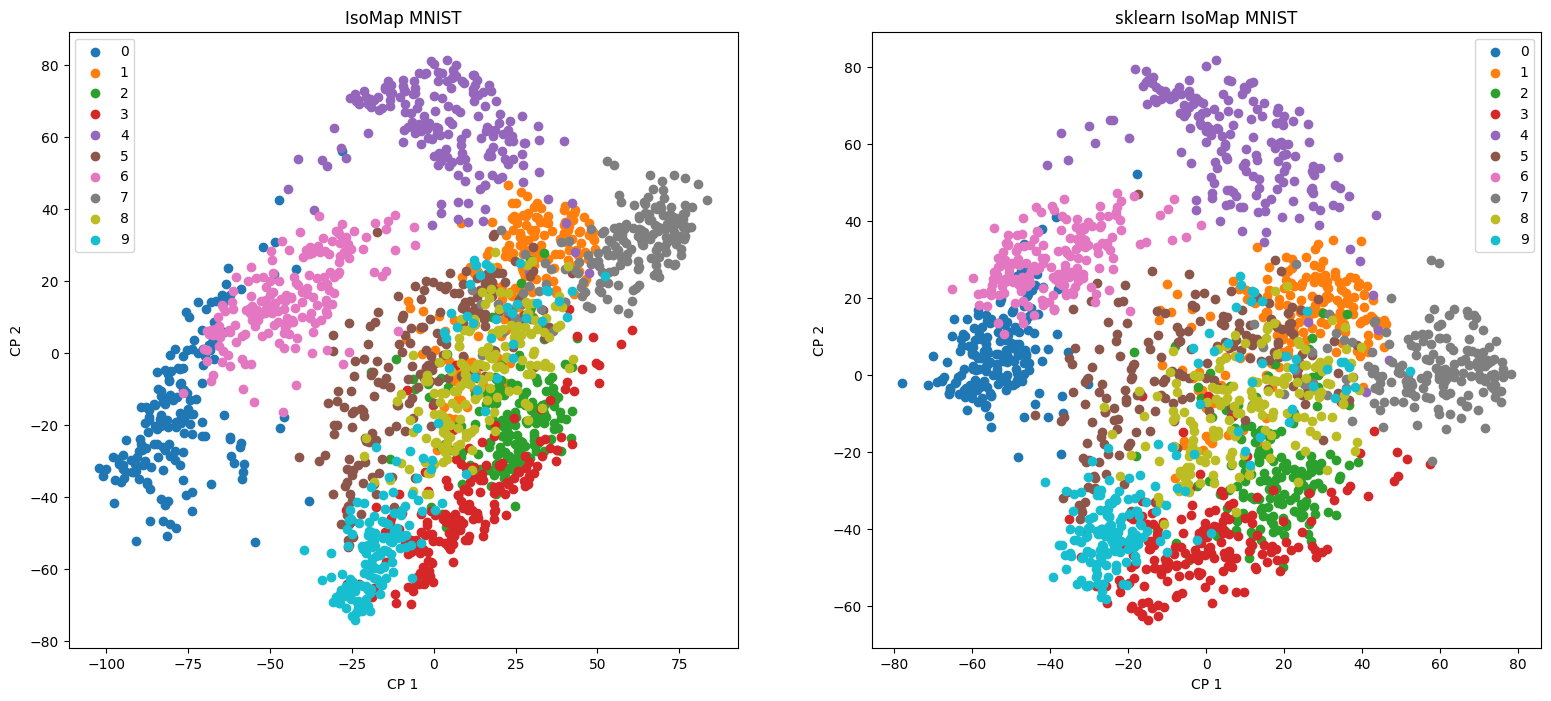

In [29]:
mean_feature_per_class = np.mean([np.sum(y_mnist == classe) for classe in np.unique(y_mnist)])
mean_feature_per_class = int(mean_feature_per_class)
Y = MDS(X_mnist,y_mnist, n_neighbors=50, n_components=2, title="MNIST")

/home/talibe/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/talibe/miniconda3/lib/python3.12/site-packages/matplotlib/collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


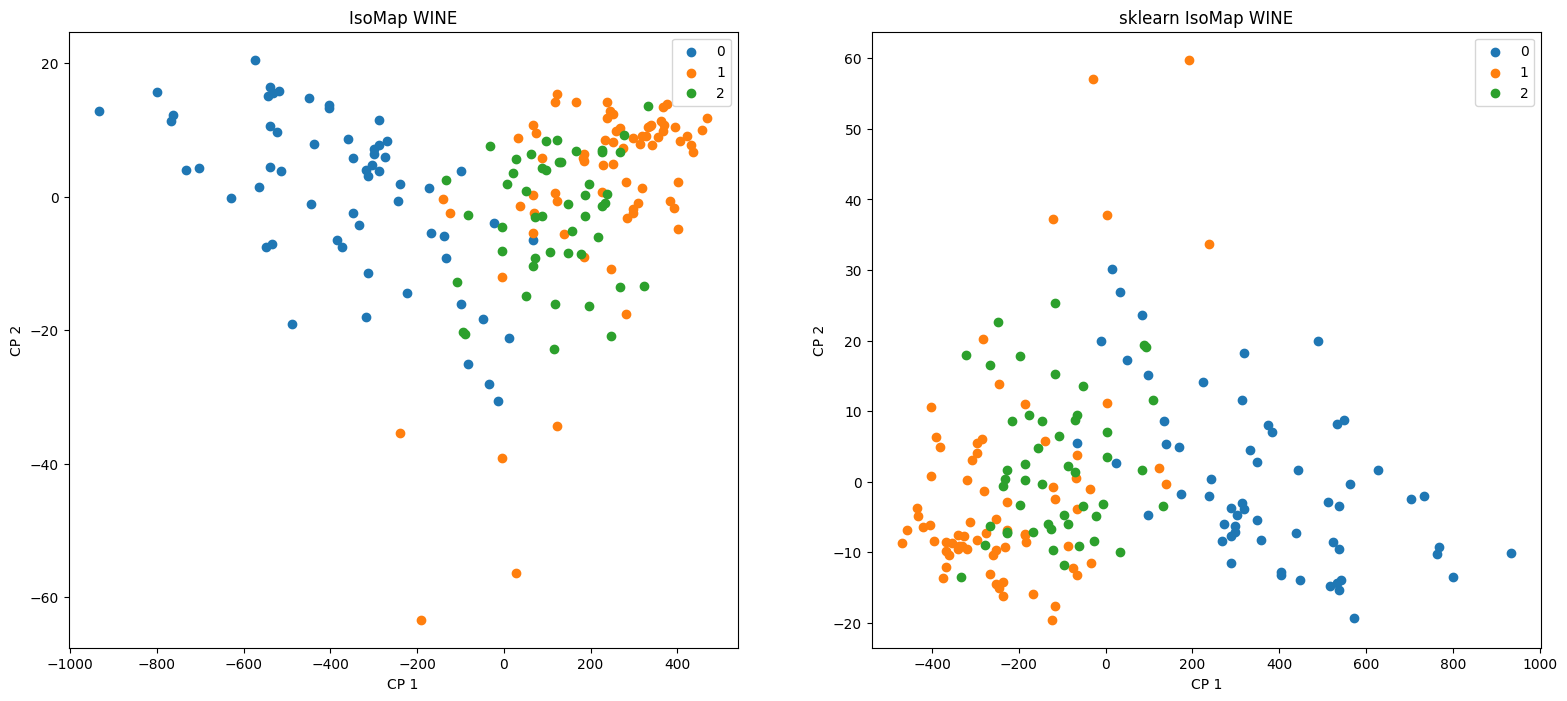

In [30]:
Y = MDS(X_wine, y_wine, n_neighbors=50, n_components=2, title="WINE")   

/home/talibe/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/talibe/miniconda3/lib/python3.12/site-packages/matplotlib/collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/home/talibe/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/talibe/miniconda3/lib/python3.12/site-packages/matplotlib/collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/home/talibe/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/talibe/miniconda3/lib/python3.12/site-packages

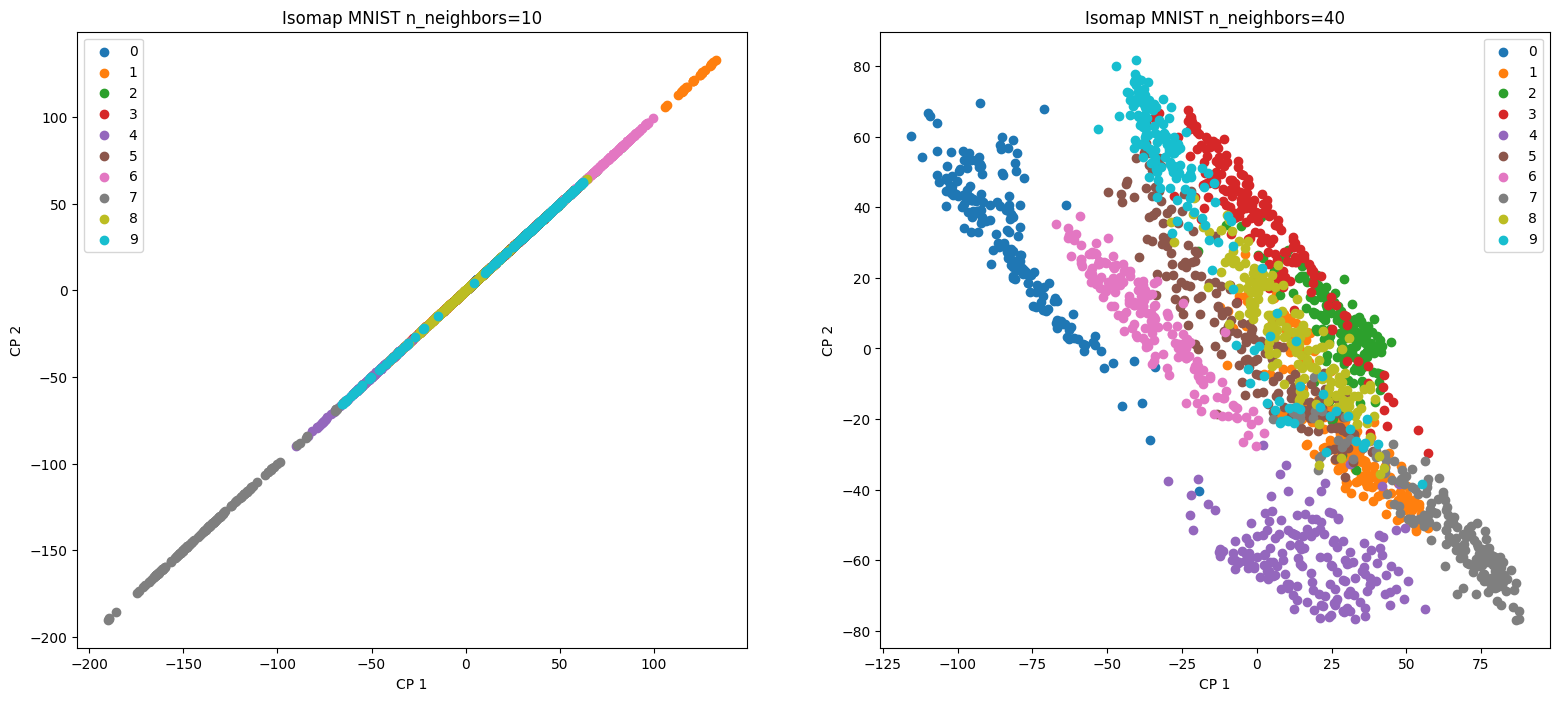

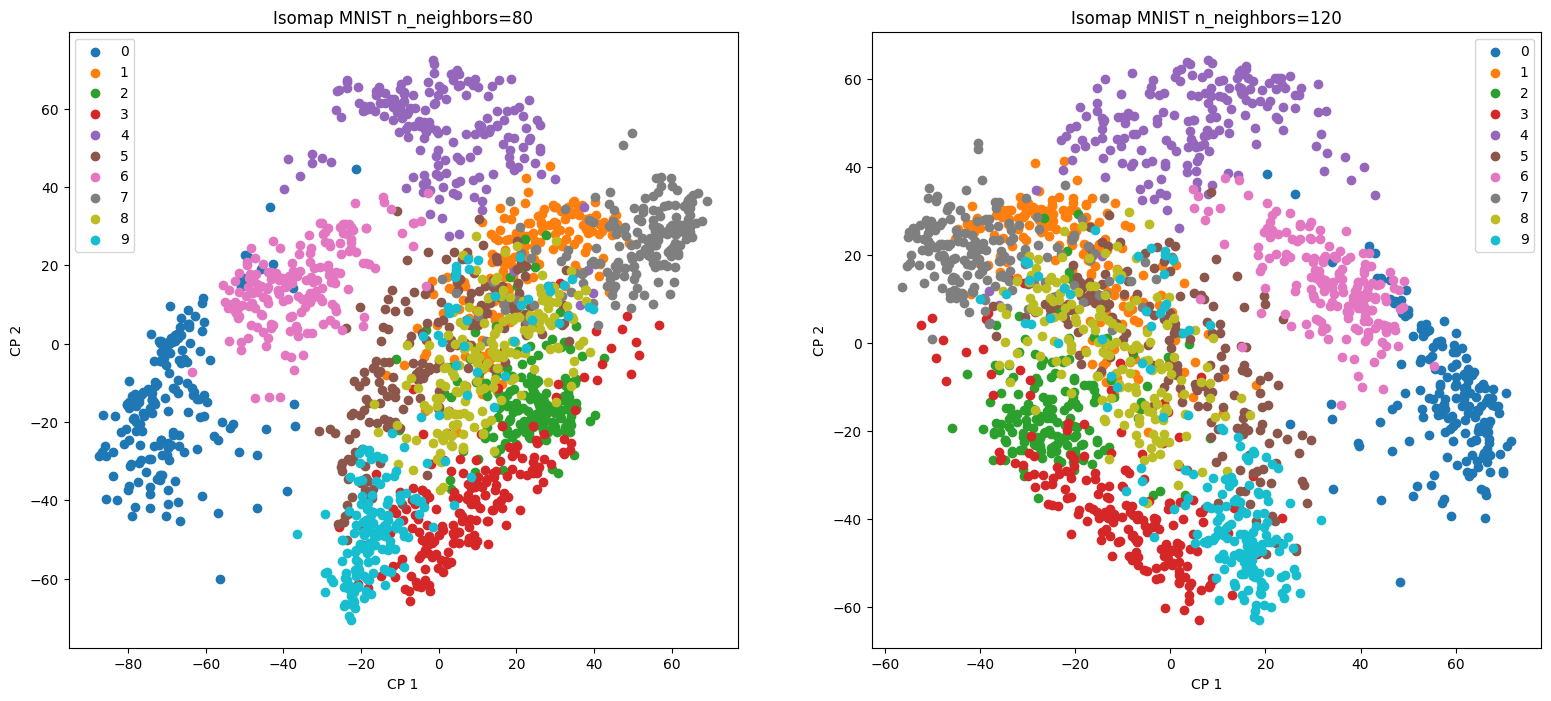

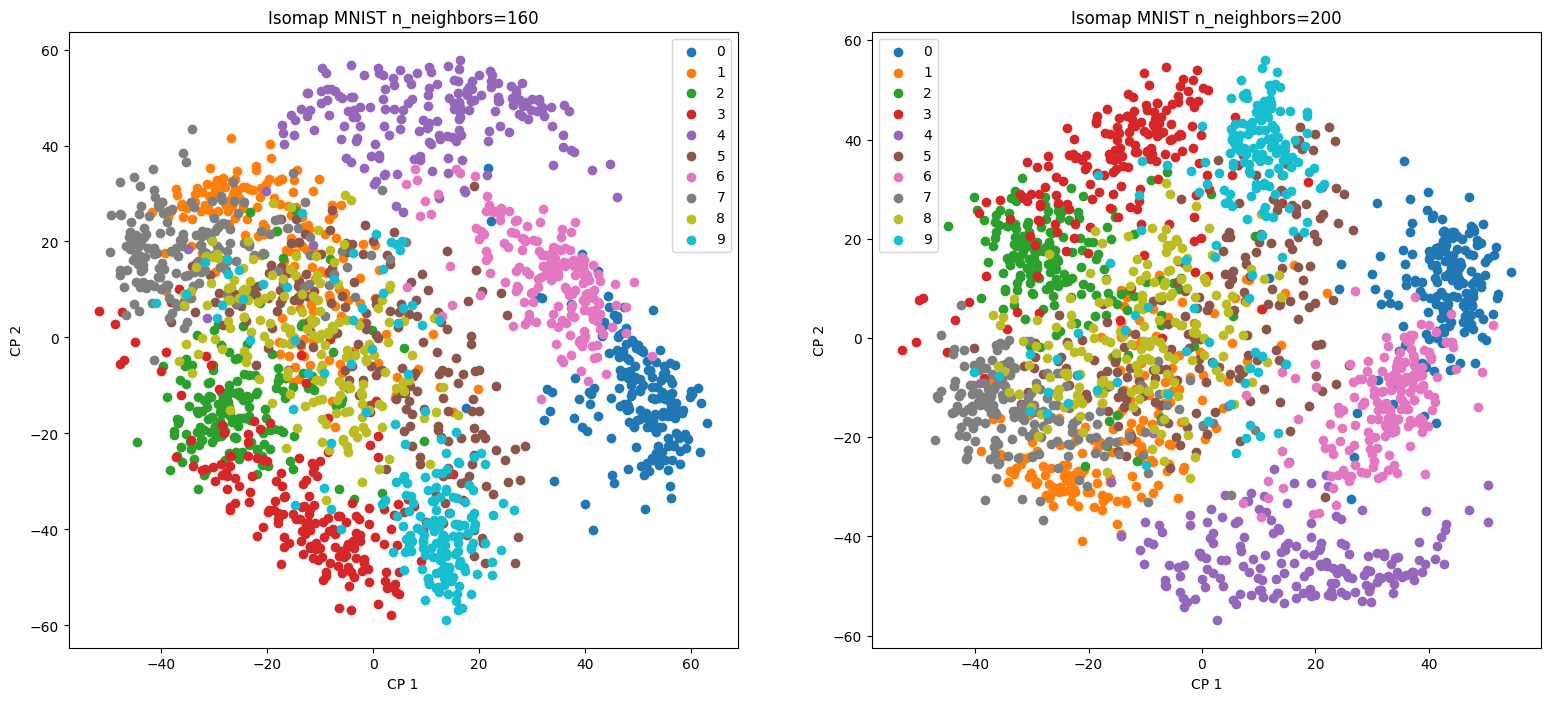

In [32]:
nns = np.array([ 10, 40, 80, 120, 160, 200])

for nn1, nn2 in zip(nns[::2], nns[1::2]):
    plt.subplots(nrows=1, ncols=2, figsize=(19, 8))
    plt.subplot(1, 2, 1)
    Y = MDS(X_mnist, y_mnist, n_neighbors=nn1, n_components=2, title=f"mnist n_neighboor {nn1}", Visualisation=False)
    for classe in np.unique(y_mnist):
        plt.scatter(Y[y_mnist == classe, 0], Y[y_mnist == classe, 1], label=classe)
    # plt.scatter(Y[:, 0], Y[:, 1], c=y_mnist, cmap=plt.cm.Set1, edgecolor='k')
    plt.xlabel('CP 1')
    plt.ylabel('CP 2')
    plt.title(f"Isomap MNIST n_neighbors={nn1}")
    plt.legend()
    plt.subplot(1, 2, 2)
    Y = MDS(X_mnist, y_mnist, n_neighbors=nn2, n_components=2, title=f"mnist n_neighboor {nn2}", Visualisation=False)
    for classe in np.unique(y_mnist):
        plt.scatter(Y[y_mnist == classe, 0], Y[y_mnist == classe, 1], label=classe)
    # plt.scatter(Y[:, 0], Y[:, 1], c=y_mnist, cmap=plt.cm.Set1, edgecolor='k')
    plt.xlabel('CP 1')
    plt.ylabel('CP 2')
    plt.legend()
    plt.title(f"Isomap MNIST n_neighbors={nn2}")
   
    

/home/talibe/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/talibe/miniconda3/lib/python3.12/site-packages/matplotlib/collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


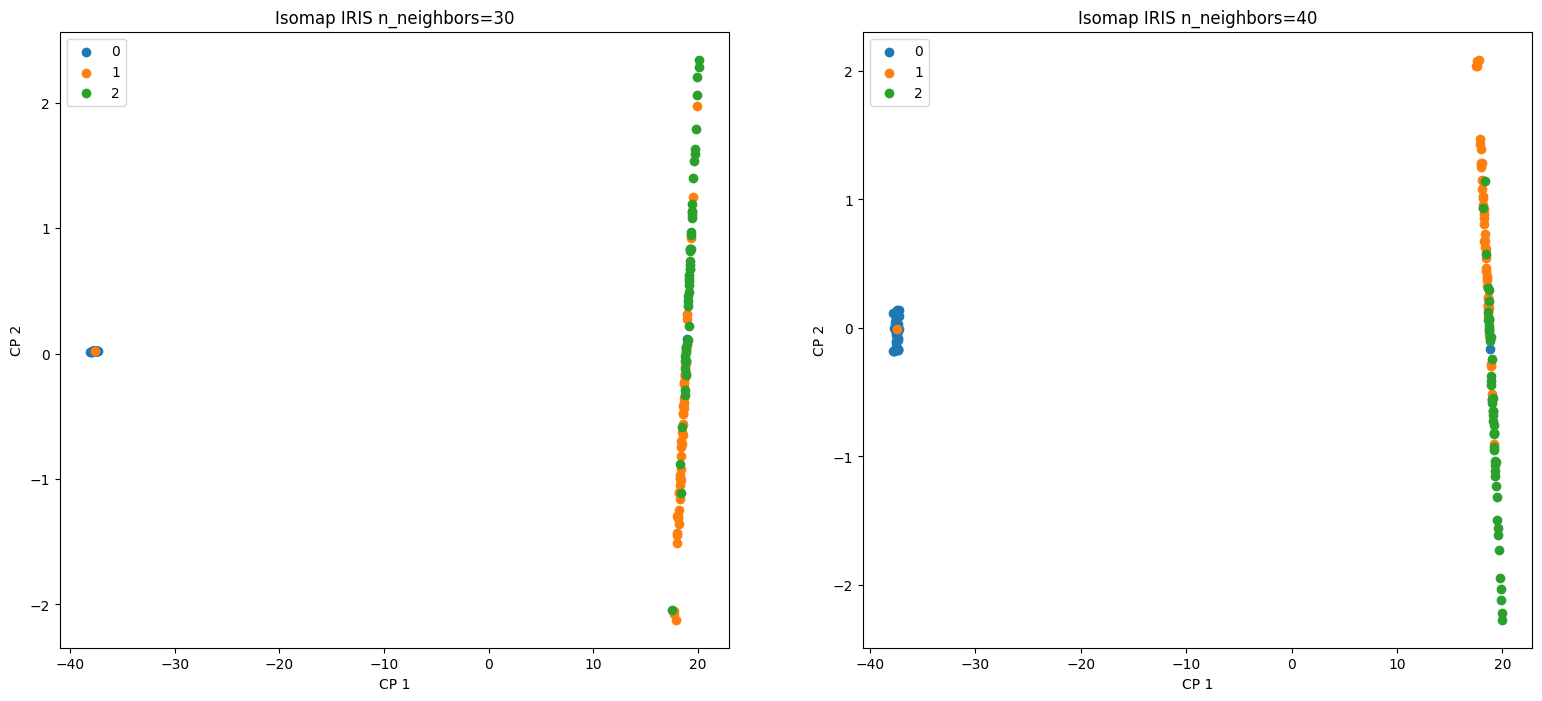

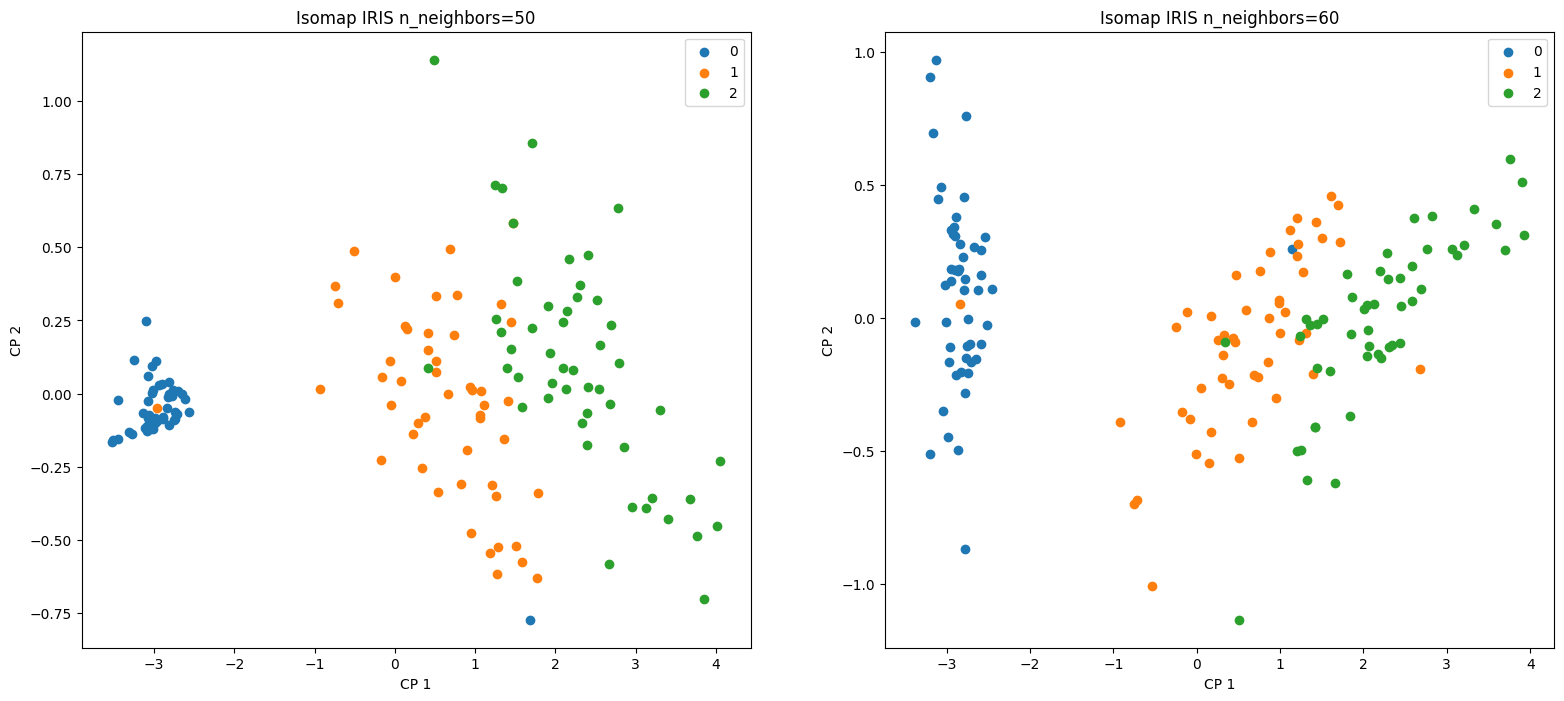

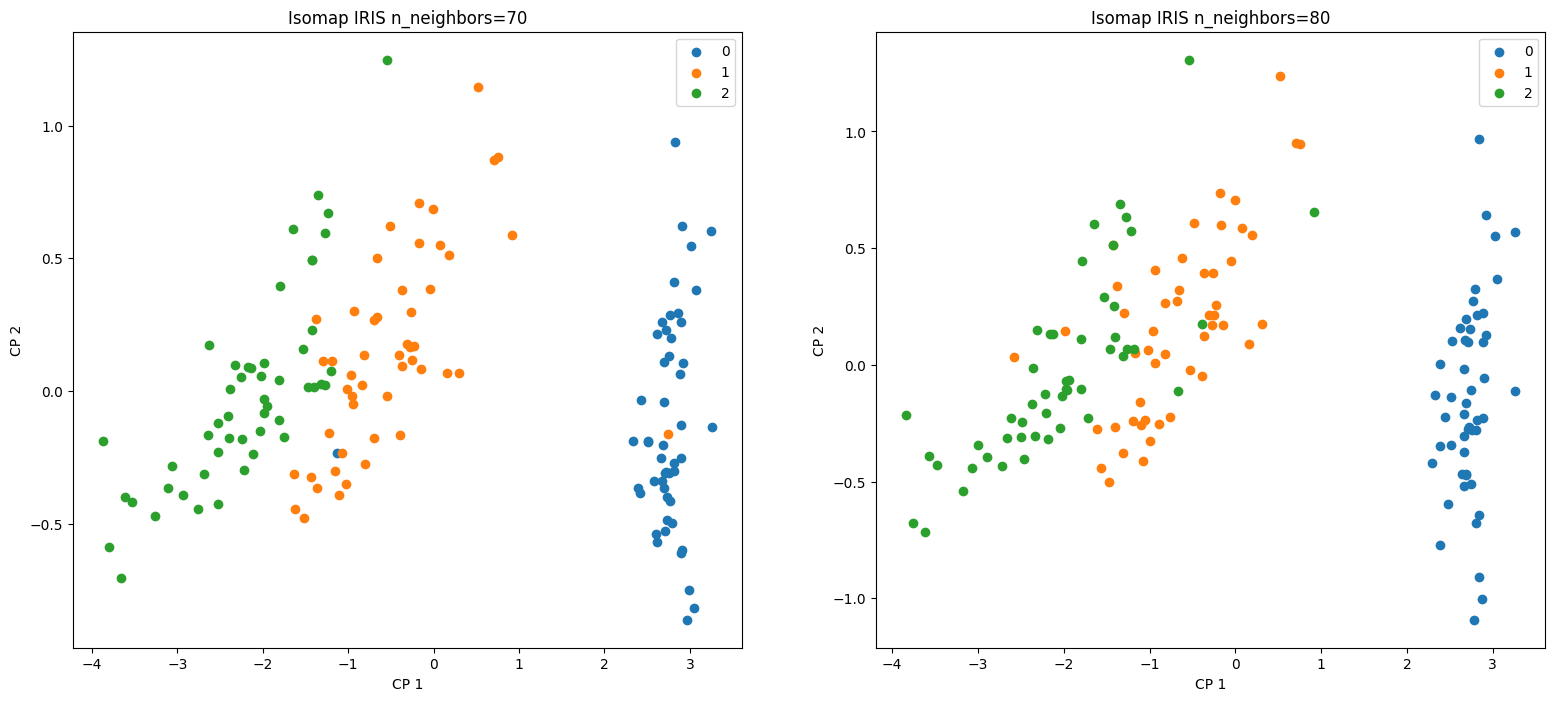

In [48]:
nns = np.array([ 30 , 40, 50, 60, 70, 80])

for nn1, nn2 in zip(nns[::2], nns[1::2]):
    plt.subplots(nrows=1, ncols=2, figsize=(19, 8))
    plt.subplot(1, 2, 1)
    Y = MDS(X_iris, y_iris, n_neighbors=nn1, n_components=2, title=f"IRIS n_neighboor {nn1}", Visualisation=False, symetric=True)
    for classe in np.unique(y_iris):
        plt.scatter(Y[y_iris == classe, 0], Y[y_iris == classe, 1], label=classe)
    # plt.scatter(Y[:, 0], Y[:, 1], c=y_iris, cmap=plt.cm.Set1, edgecolor='k')
    plt.xlabel('CP 1')
    plt.ylabel('CP 2')
    plt.title(f"Isomap IRIS n_neighbors={nn1}")
    plt.legend()
    plt.subplot(1, 2, 2)
    Y = MDS(X_iris, y_iris, n_neighbors=nn2, n_components=2, title=f"IRIS n_neighboor {nn2}", Visualisation=False, symetric=True)
    for classe in np.unique(y_iris):
        plt.scatter(Y[y_iris == classe, 0], Y[y_iris == classe, 1], label=classe)
    # plt.scatter(Y[:, 0], Y[:, 1], c=y_iris, cmap=plt.cm.Set1, edgecolor='k')
    plt.xlabel('CP 1')
    plt.ylabel('CP 2')
    plt.legend()
    plt.title(f"Isomap IRIS n_neighbors={nn2}")
   
    

/home/talibe/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/talibe/miniconda3/lib/python3.12/site-packages/matplotlib/collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


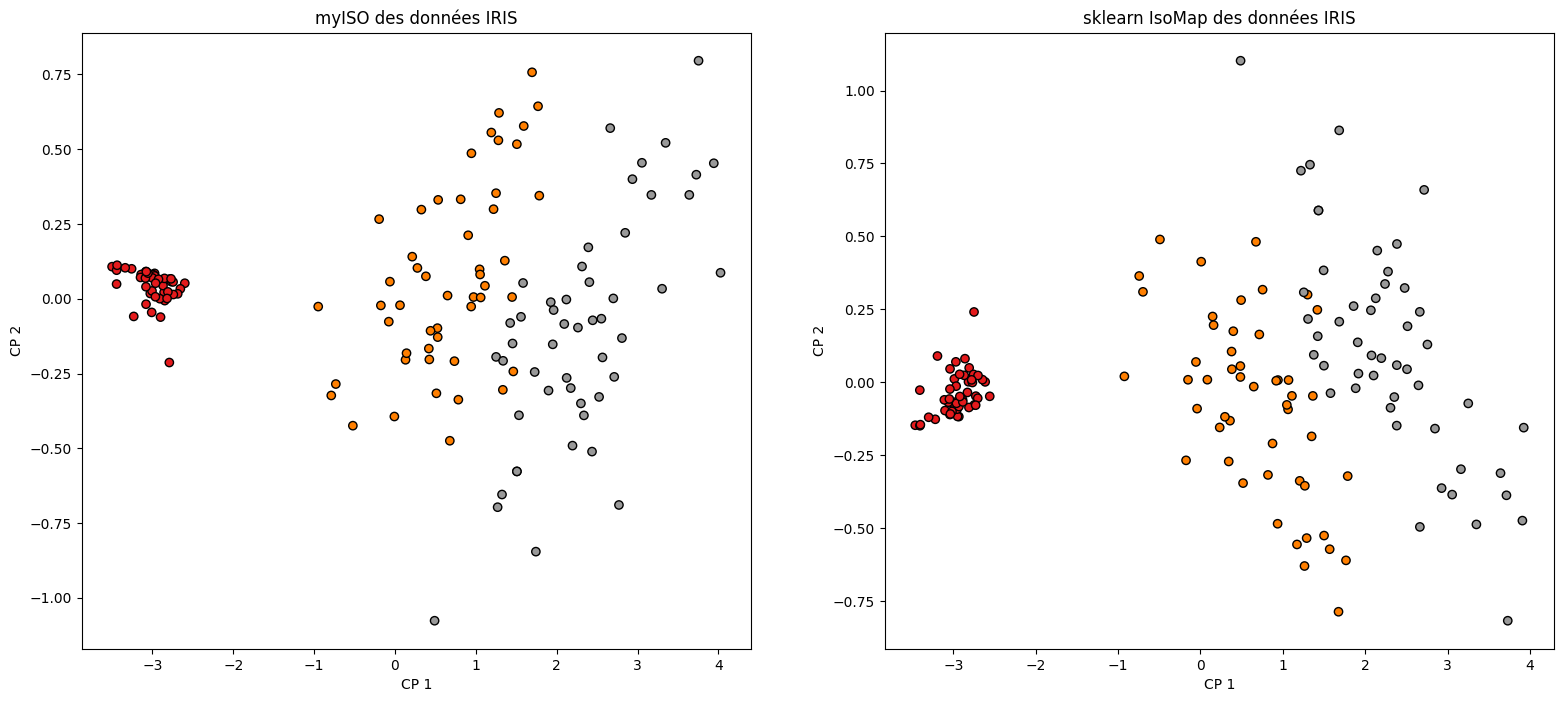

In [36]:
plt.subplots(nrows=1, ncols=2, figsize=(19, 8))

plt.subplot(1, 2, 1)
Y = MDS(X_iris, y_iris, n_neighbors=50, n_components=2, title="IRIS", Visualisation=False)
plt.scatter(Y[:, 0], Y[:, 1], c=y_iris, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title('myISO des données IRIS')

plt.subplot(1, 2, 2)
Y = manifold.Isomap(n_neighbors=50, n_components=2).fit_transform(X_iris)
plt.scatter(Y[:, 0], Y[:, 1], c=y_iris, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title('sklearn IsoMap des données IRIS')

plt.show()

/home/talibe/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/talibe/miniconda3/lib/python3.12/site-packages/matplotlib/collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


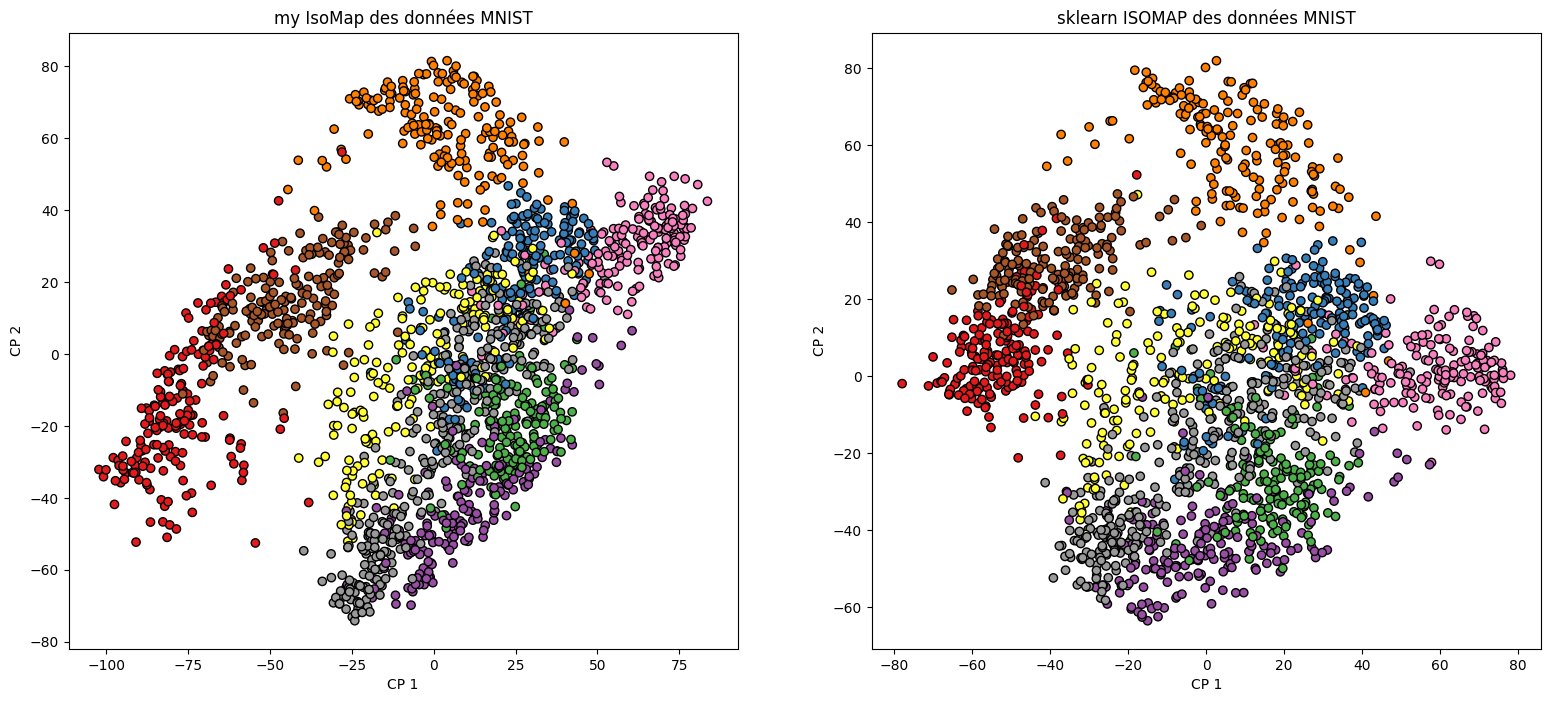

In [38]:
plt.subplots(nrows=1, ncols=2, figsize=(19, 8))

plt.subplot(1, 2, 1)
Y = MDS(X_mnist, y_mnist, n_neighbors=50, n_components=2, title="MNIST", Visualisation=False)
plt.scatter(Y[:, 0], Y[:, 1], c=y_mnist, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title('my IsoMap des données MNIST')

plt.subplot(1, 2, 2)
Y = manifold.Isomap(n_neighbors=50, n_components=2).fit_transform(X_mnist)
plt.scatter(Y[:, 0], Y[:, 1], c=y_mnist, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title('sklearn ISOMAP des données MNIST')

plt.show()